In [1]:
import matplotlib.pyplot as plt
import sxs
import numpy as np
import astropy.units as u
from scipy.special import roots_legendre, sph_harm
from matplotlib.colors import LogNorm
from scipy.linalg import lstsq
import qnm
plt.rcParams['axes.labelsize']=12
plt.rcParams['axes.titlesize']=12

import scri
import quaternion

# Load Data

In [7]:
file = np.load("all_data_scri.npz",allow_pickle=True)
times = file['times']
spectra = file['spectra']
spectra_rot = file['spectra_rot']
#spectra_rot_p = file['spectra_rot_p']

remnant_masses = file['remnant_masses']
remnant_spin_amps = file['remnant_spin_amps']
theta_offsets = file['theta_offsets']
phi_offsets = file['phi_offsets']

mass_ratios = file['mass_ratios']
catalog_names = file['catalog_names']
mis_angs = file['mis_angs']

Jdot_mis_angles = file['Jdot_mis_angles']


# Corotating Frame Pluging Angle

In [13]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [46]:
# calculating leading order chi_p based on equation 14 in Gerosa et al. 2021
chi_ps = []
i=0
for catalog_name in catalog_names:
    try:
        metadata = sxs.load("%s/Lev/metadata.json"%catalog_name)
        chi1 = np.array(metadata.reference_dimensionless_spin1)
        chi2 = np.array(metadata.reference_dimensionless_spin2)
        m1 = metadata.reference_mass1
        m2 = metadata.reference_mass2
        q = 1/metadata.reference_mass_ratio

        #S1 = chi1*m1**2
        #S2 = chi2*m2**2

        Chi1 = np.sqrt(np.sum(chi1**2))
        Chi2 = np.sqrt(np.sum(chi2**2))
        theta1 = angle_between(chi1,np.array([0,0,1]))
        theta2 = angle_between(chi2,np.array([0,0,1]))
        #print(Chi1,Chi2)
        #if (Chi1 >=0.05) and (Chi2 >=0.05):
        chi_p = max(Chi1*np.sin(theta1),Chi2*np.sin(theta2)*q*(4*q+3)/(4+3*q))
        chi_ps.append(chi_p)
        #else:
        #    chi_ps.append(0)
    except:
        chi_ps.append(0)
        print("%s not loaded properly"%catalog_name)
    i+=1
chi_ps = np.array(chi_ps)

Found the following files to load from the SXS catalog:
    SXS:BBH:0200v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0201v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0202v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0203v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0204v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0205v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0206v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0207v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0208v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0209v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0302v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0303v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0304v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0306v6/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0307v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0308v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0309v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0310v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0311v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0399v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0400v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0401v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0402v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0403v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0404v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0405v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0406v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0407v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0408v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0497v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0498v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0499v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0500v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0501v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0502v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0503v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0504v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0505v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0506v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0591v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0592v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0593v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0594v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0595v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0596v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0597v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0598v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0599v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0600v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0698v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0699v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0700v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0701v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0702v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0703v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0704v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0705v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0706v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0707v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0794v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0795v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0796v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0797v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0798v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0799v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0800v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0801v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0802v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0803v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0892v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0893v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0894v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0895v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0896v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0897v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0898v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0899v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0900v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0901v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0989v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0990v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0991v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0992v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0993v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0994v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0995v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0996v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0997v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0998v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1088v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1089v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1090v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1091v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1092v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1093v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1094v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1095v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1096v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1097v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1184v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1185v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1186v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1187v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1188v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1189v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1190v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1191v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1192v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1193v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1407v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1408v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1409v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1410v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1411v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1412v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1413v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1414v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1415v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1416v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1503v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1504v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1505v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1506v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1507v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1508v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1509v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1510v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1511v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1512v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1600v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1601v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1602v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1603v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1604v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1605v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1606v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1607v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1608v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1609v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1696v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1697v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1698v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1699v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1700v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1701v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1702v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1703v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1704v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1705v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1792v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1793v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1794v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1795v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1796v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1797v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1798v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1799v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1800v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1801v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1888v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1889v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1890v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1891v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1892v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1893v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1894v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1895v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1896v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1897v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1984v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1985v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1986v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1987v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1988v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1989v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1990v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1991v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1992v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1993v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:2081v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2082v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2083v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2084v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2085v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2086v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2087v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2088v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2089v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2090v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    

In [47]:
chi_ps.shape

(1816,)

In [48]:
Jdot_mis_angles.shape

(1816,)

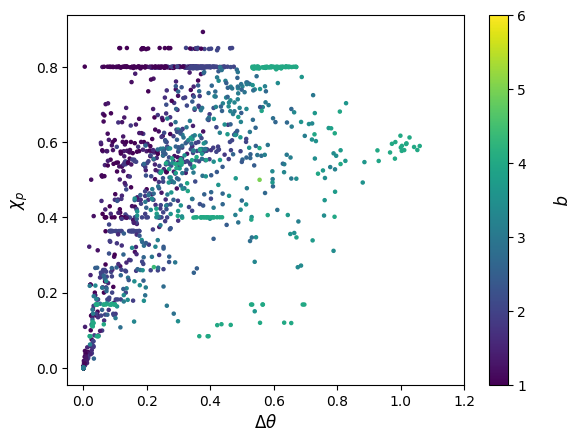

In [63]:
plt.scatter(Jdot_mis_angles,chi_ps,c=mass_ratios,vmax=6,vmin=1,s=5)
plt.xlim(-0.05,1.2)
cbar = plt.colorbar()
cbar.set_label('$q$', rotation=270,labelpad=30)

plt.ylabel('$\\chi_p$')
plt.xlabel('$\\Delta \\theta$')
plt.show()